# Analisis de Clase de complejidad del problema

### Esta en NP:

Este problema pertenece a la clase de complejidades NP ya que existe un verificador que puede checkear la correctitud de una solucion al mismo en tiempo polinomial, como se puede ver a continuacion.

In [1]:
def verificar(A, B, k, sol):
    if len(sol) > k:
        return False
    
    for subconjunto in B:
        hit = False
        for elem in subconjunto:
            if elem in sol:
                hit = True
                break
        if not hit:
            return False
    
    return True

La complejidad temporal de este verificador es **O(m\*n)** ya que se iteran todos los *m* subconjuntos y por cada uno se ven sus elementos que en el peor caso serian *n*. Esta complejidad es polinomial.

### Esta en NP-Completo:

Para demostrar que este problema de Hitting set se encuentra en la clase NP-completo se reducira polinomialmente un problema conocido que este en esa clase a HS, en este caso se hara con el problema Dominating set.

* Primeramente para poder hacer que HS resuelva DS hay que adaptar la entrada. Dada una instancia de DS se debera crear un conjunto A con todos los nodos del grafo G (que es parte de dicha instancia), una vez creado ese conjunto habra que crear un nuevo conjunto de conjuntos B, en el que se pondra un subconjunto B_i por cada nodo en G, y ese subconjunto incluira el mismo nodo y todos sus adyacentes. Una vez hechas estas 2 cosas, se le da A, B y el k sin modificar (de la instancia de DS) a una caja negra resolvedora de Hitting set. *Estas transformaciones se hacen en tiempo polinomial ya que para eso basta con usar un recorrido de grafos como bfs.*
* La caja negra se ejecutara 1 sola vez, y dara el resultado de Hitting set.
* Una vez obtenido el resultado de Hitting set, tendremos un conjunto de nodos que a su vez es exactamente la solucion de Dominating set, esto es porque hitting set se asegurara de seleccionar al menos 1 elemento de cada subconjunto en B lo que es lo mismo que decir que dado un nodo *u* se asegura de seleccionarlo o almenos seleccionar a alguno de sus adyacentes (y eso es lo que busca Dominating set).

**Entonces podemos decir que DS <= HS (reduccion polinomica) y por lo tanto HS pertenece a NP-Completo**

Aqui se puede ver un ejemplo que demuestra lo dicho:

![ejemplo](./utils/ejemplo.png)

# Analisis de tiempos del algoritmo

In [ ]:

from algoritmo_aproximado import hitting_set_greedy
from algoritmo_backtracking import obtener_hitting_set
from utils.utils import obtener_conjunto_y_subconjuntos
from time import time
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

def correr_benchmark_optimo(A, B):
    
    empieza = time()
    obtener_hitting_set(A, B)
    termina = time()
    
    return termina - empieza

def correr_benchmark_aproximado(A, B):
    
    empieza = time()
    hitting_set_greedy(A,B)
    termina = time()
    
    return termina - empieza


### Tiempo del algoritmo optimo en funcion de la cantidad de peticiones *n*

* En estas pruebas se vera como la cantidad de peticiones por parte de la prensa afecta al tiempo que tarda el algoritmo optimo por backtracking

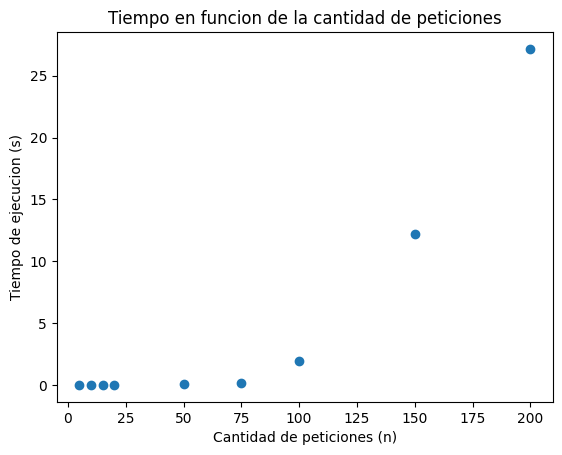

In [4]:
def plottear_tiempos_de_optimo_en_funcion_de_cantidad_de_peticiones():

    archivos = ["./archivos_prueba/5.txt", "./archivos_prueba/10_varios.txt", "./archivos_prueba/15.txt", "./archivos_prueba/20.txt", "./archivos_prueba/50.txt", "./archivos_prueba/75.txt", "./archivos_prueba/100.txt", "./archivos_prueba/150_not_for_testing.txt", "./archivos_prueba/200.txt"]
    cantidades = [5, 10, 15, 20, 50, 75, 100, 150, 200]
    tiempos = []
    for archivo in archivos:
        A, B = obtener_conjunto_y_subconjuntos(archivo)
        tiempos.append(correr_benchmark_optimo(A, B))

    plt.scatter(x=cantidades, y=tiempos)
    plt.title("Tiempo en funcion de la cantidad de peticiones")
    plt.xlabel("Cantidad de peticiones (n)")
    plt.ylabel("Tiempo de ejecucion (s)")
    
plottear_tiempos_de_optimo_en_funcion_de_cantidad_de_peticiones()

Se puede observar que a medida que aumenta el valor de *n* el tiempo que tarda el algoritmo aumenta exponencialmente.

### Tiempo del algoritmo aproximado en funcion de la cantidad de peticiones *n*

* En estas pruebas se vera 

Corriendo benchmark: 100%|██████████| 100/100 [00:02<00:00, 36.43it/s]


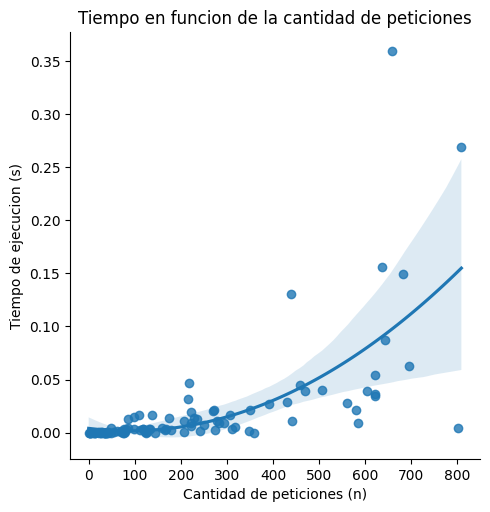

In [10]:
import numpy as np
import random
from tqdm import tqdm  # Importa tqdm

random.seed(7)

def n_log_n(n):
    return n * np.log(n)
MAX_SUBCONJUNTOS = 1000
def plottear_tiempos_de_aproximado_en_funcion_de_cantidad_de_peticiones():
    # archivos = ["./archivos_prueba/5.txt", "./archivos_prueba/10_varios.txt", "./archivos_prueba/15.txt", "./archivos_prueba/20.txt", "./archivos_prueba/50.txt", "./archivos_prueba/75.txt", "./archivos_prueba/100.txt", "./archivos_prueba/150_not_for_testing.txt", "./archivos_prueba/175_not_for_testing.txt", "./archivos_prueba/200.txt"]
    cantidades = []
    tiempos = []
    for i in tqdm(range(1, MAX_SUBCONJUNTOS + 1, 10), desc="Corriendo benchmark"):
        cant_a = random.randint(1, i)
        cant_b = random.randint(1, i)
        A = [j for j in range(cant_a)]
        B = []
        for i in range(cant_b):
            cant = random.randint(1, cant_a)
            B.append(random.sample(A, cant))
        cantidades.append(i)
        tiempos.append(correr_benchmark_aproximado(A, B))


    df = pd.DataFrame(data={"cantidades": cantidades, "tiempos": tiempos})

    # Calcula los valores de n(log(n))
    # df['n_log_n'] = df['cantidades'].apply(n_log_n)

    # Traza la gráfica
    df = pd.DataFrame(data={"cantidades": cantidades, "tiempos": tiempos})
    sns.lmplot(x='cantidades', y='tiempos', data=df, order=2)
    plt.title("Tiempo en funcion de la cantidad de peticiones")
    plt.xlabel("Cantidad de peticiones (n)")
    plt.ylabel("Tiempo de ejecucion (s)")
    

plottear_tiempos_de_aproximado_en_funcion_de_cantidad_de_peticiones()


En este grafico se puede observar 

### Ejemplos de ejecucion

In [23]:
# 5 elems
A, B = obtener_conjunto_y_subconjuntos("./archivos_prueba/5.txt")
ejecucion_optimo = obtener_hitting_set(A, B)
ejecucion_aproximado = hitting_set_greedy(A, B)
print('5 PETICIONES\n')
print(f'Algoritmo Optimo:\nCantidad de jugadores: {len(ejecucion_optimo)}\nLista de jugadores: {ejecucion_optimo}\n')
print(f'Algoritmo Aproximado:\nCantidad de jugadores: {len(ejecucion_aproximado)}\nLista de jugadores: {ejecucion_aproximado}\n')

A, B = obtener_conjunto_y_subconjuntos("./archivos_prueba/7.txt")
ejecucion_optimo = obtener_hitting_set(A, B)
ejecucion_aproximado = hitting_set_greedy(A, B)
print('\n7 PETICIONES\n')
print(f'Algoritmo Optimo:\nCantidad de jugadores: {len(ejecucion_optimo)}\nLista de jugadores: {ejecucion_optimo}\n')
print(f'Algoritmo Aproximado:\nCantidad de jugadores: {len(ejecucion_aproximado)}\nLista de jugadores: {ejecucion_aproximado}\n')

A, B = obtener_conjunto_y_subconjuntos("./archivos_prueba/10_pocos.txt")
ejecucion_optimo = obtener_hitting_set(A, B)
ejecucion_aproximado = hitting_set_greedy(A, B)
print('\n10 PETICIONES\n')
print(f'Algoritmo Optimo:\nCantidad de jugadores: {len(ejecucion_optimo)}\nLista de jugadores: {ejecucion_optimo}\n')
print(f'Algoritmo Aproximado:\nCantidad de jugadores: {len(ejecucion_aproximado)}\nLista de jugadores: {ejecucion_aproximado}\n')



5 PETICIONES

Algoritmo Optimo:
Cantidad de jugadores: 2
Lista de jugadores: ['Cuti Romero', 'Wachoffisde Abila']

Algoritmo Aproximado:
Cantidad de jugadores: 2
Lista de jugadores: ['Casco', 'Colo Barco']


7 PETICIONES

Algoritmo Optimo:
Cantidad de jugadores: 2
Lista de jugadores: ['Colidio', "Barcon't"]

Algoritmo Aproximado:
Cantidad de jugadores: 2
Lista de jugadores: ["Barcon't", 'Colidio']


10 PETICIONES

Algoritmo Optimo:
Cantidad de jugadores: 3
Lista de jugadores: ['Chiquito Romero', 'Di Maria', 'Casco']

Algoritmo Aproximado:
Cantidad de jugadores: 4
Lista de jugadores: ['Wachoffisde Abila', 'Gallardo', 'Di Maria', 'Messi']



# Cota empirica

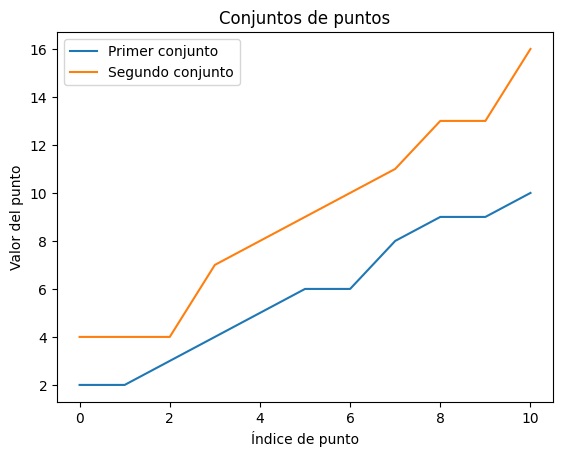

In [21]:
import matplotlib.pyplot as plt

y1 = []
y2 = []

archivo = 'resultados.txt'

with open(archivo, 'r') as file:
    for line in file:
        if line.strip() and '(' in line and ')' in line:
            data = line.strip().split('(')[1].split(')')[0].split(',')
            if len(data) == 2:  
                y1.append(int(data[0]))
                y2.append(int(data[1]))

y1.sort()
y2.sort()

plt.plot(y1, label='Algoritmo óptimo')
plt.plot(y2, label='Algoritmo aproximado')

plt.xlabel('Índice del punto')
plt.ylabel('Cantidad de jugadores en la solucion')
plt.title('Cantidad de jugadores obtenidos por cada algoritmo')
plt.legend()

plt.show()

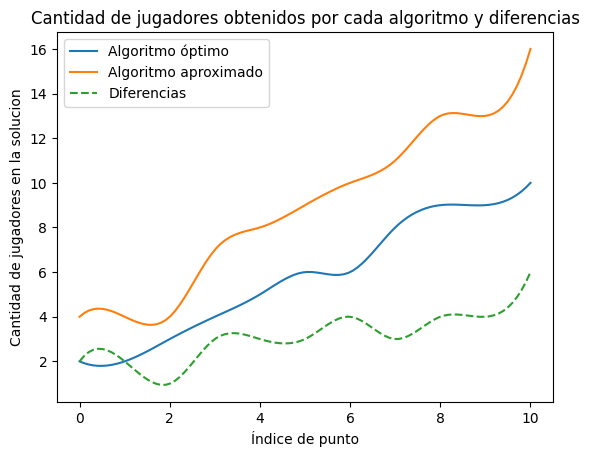

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

y1 = []
y2 = []

archivo = 'resultados.txt'

with open(archivo, 'r') as file:
    for line in file:
        if line.strip() and '(' in line and ')' in line:
            data = line.strip().split('(')[1].split(')')[0].split(',')
            if len(data) == 2:  
                y1.append(int(data[0]))
                y2.append(int(data[1]))

y1.sort()
y2.sort()

x = np.arange(len(y1))

# Interpolar con CubicSpline
spline_y1 = CubicSpline(x, y1)
spline_y2 = CubicSpline(x, y2)

x_interp = np.linspace(0, len(y2)-1, 100)

y1_interp = spline_y1(x_interp)
y2_interp = spline_y2(x_interp)

differences = y2_interp - y1_interp

plt.plot(x_interp, y1_interp, label='Algoritmo óptimo')
plt.plot(x_interp, y2_interp, label='Algoritmo aproximado')
plt.plot(x_interp, differences, label='Diferencias', linestyle='--')

plt.xlabel('Índice del punto')
plt.ylabel('Cantidad de jugadores en la solucion')
plt.title('Cantidad de jugadores obtenidos por cada algoritmo y diferencias')
plt.legend()

plt.show()